# Import necessary libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [6]:
# Load the dataset
df = pd.read_csv('dataset/races.csv')

## Assessing Data Quality

### Verify the datatypes make intuitive sense

In [27]:
df.dtypes

_url                    object
name                    object
points                 float64
uci_points             float64
length                 float64
climb_total            float64
profile                float64
startlist_quality        int64
average_temperature    float64
date                    object
position                 int64
cyclist                 object
cyclist_age            float64
is_tarmac                 bool
is_cobbled                bool
is_gravel                 bool
cyclist_team            object
delta                  float64
dtype: object

### Check for missing values

In [7]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the result
print(missing_values)

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


### Check for possible placeholder values

In [9]:
# List of potential "placeholders"
unknown_values = ["unknown", "N/A", "none", "missing", "na", "null", "", "other"]

# Check each column for occurrences of these values (case-insensitive)
unknown_counts = df.apply(lambda col: col.astype(str).str.lower().isin(unknown_values).sum())

# Display the counts of "placeholder" values for each column
print(unknown_counts)

_url                   0
name                   0
points                 0
uci_points             0
length                 0
climb_total            0
profile                0
startlist_quality      0
average_temperature    0
date                   0
position               0
cyclist                0
cyclist_age            0
is_tarmac              0
is_cobbled             0
is_gravel              0
cyclist_team           0
delta                  0
dtype: int64


### Check for duplicates

In [13]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

# Display the number of duplicate rows (and the rows themselves if count > 0)
print(f"Number of duplicate rows: {num_duplicate_rows}")
if num_duplicate_rows:
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


### Check for Inconsistent Values in Categorical Columns

### Check Numeric Ranges

Make sure numeric values fall within realistic ranges (e.g. length cannot be negative)

In [28]:
negative_lengths = df[df['length'] <= 0]
print(f"Number of races with negative or zero length: {len(negative_lengths)}")

negative_climbs = df[df['climb_total'] <= 0]
print(f"Number of races with negative or zero climb total: {len(negative_climbs)}")

negative_points = df[(df['points'] < 0) | (df['uci_points'] < 0)]
print(f"Number of races with negative points: {len(negative_points)}")

negative_positions = df[df['position'] < 0]
print(f"Number of races with negative positions: {len(negative_positions)}")

negative_delta = df[df['delta'] < 0]
print(f"Number of races with negative delta times: {len(negative_delta)}")



Number of races with negative or zero length: 0
Number of races with negative or zero climb total: 0
Number of races with negative points: 0
Number of races with negative positions: 0
Number of races with negative delta times: 86


### Identify outliers (IQR?)

Number of outliers in average temperature: 0


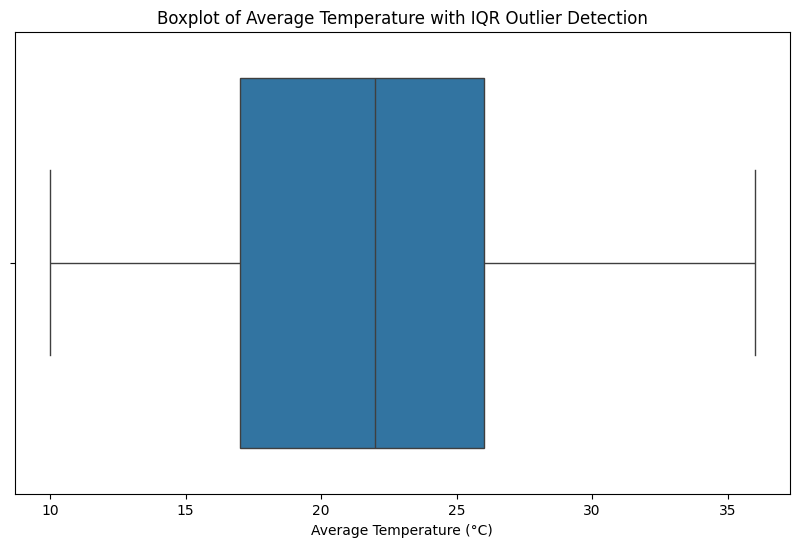

Number of outliers in race length: 81960


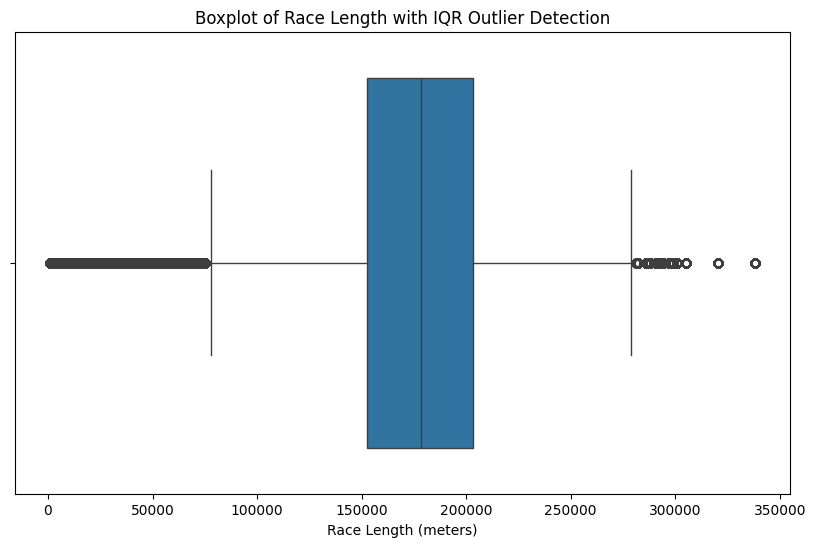

                                _url                        name  points  \
426  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
427  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
428  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
429  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
430  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
431  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
432  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
433  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
434  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
435  volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   

     uci_points  length  climb_total  profile  startlist_quality  \
426         NaN  8100.0          NaN      NaN                804   
427         NaN  8100.0    

In [35]:
# Use the IQR to find outliers for the average_temperature
Q1 = df['average_temperature'].quantile(0.25)
Q3 = df['average_temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['average_temperature'] < lower_bound) | (df['average_temperature'] > upper_bound)]

print(f"Number of outliers in average temperature: {len(outliers)}")

# Plot the data using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['average_temperature'])
plt.title('Boxplot of Average Temperature with IQR Outlier Detection')
plt.xlabel('Average Temperature (°C)')
plt.show()


# TODO this is repetitive, create a function instead
# Use the IQR to find outliers for the race length 
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['length'] < lower_bound) | (df['length'] > upper_bound)]

print(f"Number of outliers in race length: {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['length'])
plt.title('Boxplot of Race Length with IQR Outlier Detection')
plt.xlabel('Race Length (meters)')
plt.show()

# Print the first 10 outliers since we actually HAVE outliers here...
print(outliers.head(10))